#### 相关性分析

In [ ]:
# 相关性研究
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib import gridspec
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")
# 画相关系数热力图
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

def test(df):
    dfData = df.corr()
    plt.subplots(figsize=(18, 18)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues",annot_kws={'size':15})
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig(r"D:\31890\Desktop\senescence\corr.svg",dpi=200, bbox_inches='tight')
 
    plt.show()

df = pd.read_excel(r"D:\31890\Desktop\senescence\表型分析\Phenotypic_analysis.xlsx", skipfooter=0)

print(df)
test(df)

#### 拟合函数

RangeIndex(start=0, stop=102, step=1)
Index(['time', 'day', 'background', 'senescence', 'normal', 'taproot', 'class',
       'proportion of senescence', 'proportion of normal'],
      dtype='object')


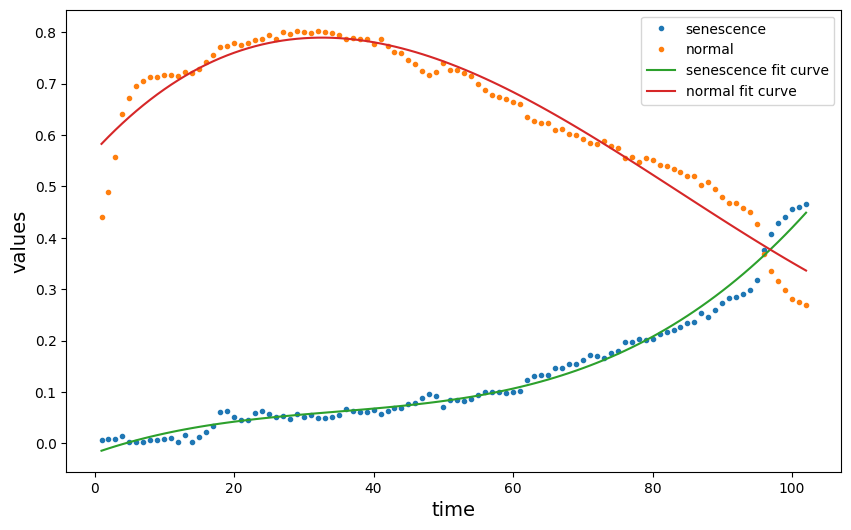

senescence_mse:0.00025013061573514456
normal_mse:0.0011313551745911826
senescence_r2:0.9812904917224142
normal_r2:0.942235567062003


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import r2_score#R square

df_data = pd.read_excel(r'D:\31890\Desktop\codefile\Utils\data\pixel_data.xlsx')
# print(df_data)
print(df_data.index)
print(df_data.columns)

x = df_data['day'].values
senescence = df_data['proportion of senescence'].values
normal = df_data['proportion of normal'].values
senescence1 = np.polyfit(x, senescence, 3) #用3次多项式拟合，输出系数从高到0
p1 = np.poly1d(senescence1) #使用次数合成多项式
senescence_pre = p1(x)

normal1 = np.polyfit(x, normal, 3) #用3次多项式拟合，输出系数从高到0
p2 = np.poly1d(normal1) #使用次数合成多项式
normal_pre = p2(x)

plt.figure(figsize= (10,6))
plt.plot(x,senescence,'.')
plt.plot(x,normal,'.')
plt.plot(x,senescence_pre)
plt.plot(x,normal_pre)
plt.legend(['senescence','normal',
            'senescence fit curve','normal fit curve'])

plt.ylabel('values',fontsize=14)
plt.xlabel('time',fontsize=14)

# plt.xticks([]), plt.yticks([])
plt.savefig(r'D:\31890\Desktop\codefile\Utils\data\fit2.svg',dpi=200, bbox_inches='tight')
plt.show()

senescence_mse =mean_squared_error(senescence,senescence_pre)
senescence_r2 = r2_score(senescence,senescence_pre)
normal_mse =mean_squared_error(normal,normal_pre)
normal_r2 = r2_score(normal,normal_pre)
print('senescence_mse:{}'.format(senescence_mse))
print('normal_mse:{}'.format(normal_mse))
print('senescence_r2:{}'.format(senescence_r2))
print('normal_r2:{}'.format(normal_r2))